In [ ]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



In [ ]:
data = pd.read_csv("/content/facebook_data.csv")

In [ ]:
data.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,Awsome sound powerful bass battery backup is a...,5


In [ ]:
print(data.isnull().sum())

review    0
rating    0
dtype: int64


In [ ]:
import nltk
import re
nltk.download('stopwords')
stemmer= nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopwords=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def clean(text):
  text=str(text).lower()
  text=re.sub('\[.*?\]','',text)
  text=re.sub('https?://\s+|www\.\s+','',text)
  text=re.sub('<.*?>+','',text)
  text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
  text=re.sub('\n','',text)
  text=re.sub('\w*\d\w*','',text)
  text=[word for word in text.split(' ')if word not in stopwords]
  text=" ".join(text)
  text=[stemmer.stem(word)for word in text.split(' ')]
  text=" ".join(text)
  return text

In [ ]:
data['review']=data['review'].apply(clean)
data.head()

,review,rating
0,nice produt like design lot easi carri look...,5
1,awesom soundveri pretti see nd sound qualiti g...,5
2,awesom sound qualiti pros hrs batteri life in...,4
3,think good product per qualiti also design qui...,5
4,awsom sound power bass batteri backup also exc...,5


In [ ]:
#The rating column of the data contains the ratings given by every reviewer,so,
#let's have a look at how most of the people rate the products they buy from Flipkart
ratings=data['rating'].value_counts()
numbers=ratings.index
quantity=ratings.values

import plotly.express as px

figure=px.pie(data,
              values=quantity,
              names=numbers,hole=0.5)
figure.show()

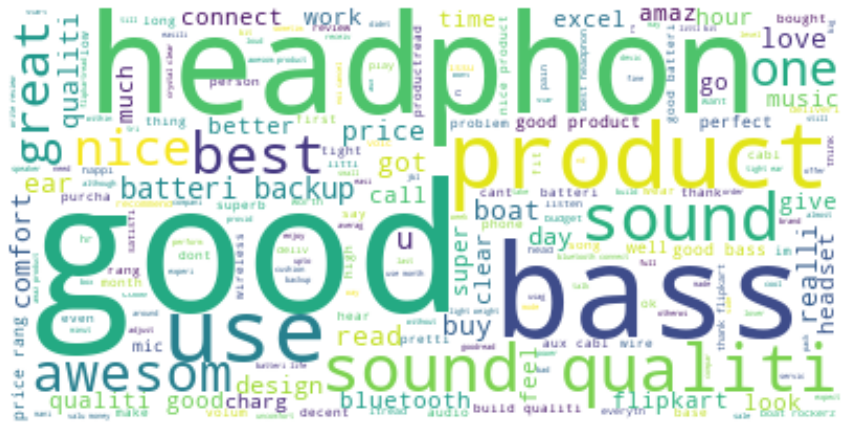

In [ ]:
#let's have a look at the kind of reviews people leave
text=" ".join(i for i in data.review)
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords,
                    background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#Analyze the sentiment of Flipkart reviews by adding three columns in the dataset
#Positive,Nagative and Neutral
nltk.download('vader_lexicon')
sentiments=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
data["Positive"]=[sentiments.polarity_scores(i)["pos"]for i in data['review']]
data["Negative"]=[sentiments.polarity_scores(i)["neg"]for i in data['review']]
data["Neutral"]=[sentiments.polarity_scores(i)["neu"]for i in data['review']]
data=data[['review','Positive','Negative','Neutral']]
data.head()


,review,Positive,Negative,Neutral
0,nice produt like design lot easi carri look...,0.431,0.000,0.569
1,awesom soundveri pretti see nd sound qualiti g...,0.471,0.000,0.529
2,awesom sound qualiti pros hrs batteri life in...,0.194,0.000,0.806
3,think good product per qualiti also design qui...,0.393,0.049,0.558
4,awsom sound power bass batteri backup also exc...,0.479,0.029,0.492


In [ ]:
#Next we can see how most of the reviewers think about the product and service of flipkart
x=sum(data["Positive"])
y=sum(data["Negative"])
z=sum(data["Neutral"])

def sentiment_score(a,b,c):
  if(a>b) and (a>c):
    print("Positive")
  elif (b>a) and (b>c):
    print("Negative")
  else:
      print("Neutral") 
sentiment_score(x,y,z)      

Neutral


In [ ]:
#New we can see total of positive, Negative and Neutral score
#to find a conclusion about flipkart reviews
print("Positive: ",x)
print("Negative: ",y)
print("Neutral: ",z)


Positive:  179.48500000000018
Negative:  17.723
Neutral:  291.78999999999985
